<center><h1>Assignment 6</h1></center>




- **Name: Udit Singh**
- **Roll No: 2018IMT-101**
- **Course: Machine Learning Lab**
- **Course Code: ITIT-4107**
- **Deadline: 15 November 2021**

Importing necessary library for generating datasets and implementing the linear and polynomial models.

In [2]:
from sklearn.model_selection import train_test_split
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Importing the dataset

In [3]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()
X=data.data

Y=data.target
df = np.array(df)

Exploring the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


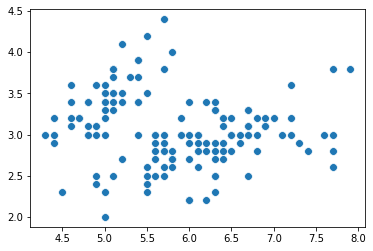

In [27]:
sns.scatterplot(df[:, 0], df[:, 1], s=60, palette='deep')

In [5]:
pd.DataFrame(data.data, columns=data.feature_names).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Implementing K-Means Clustering

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


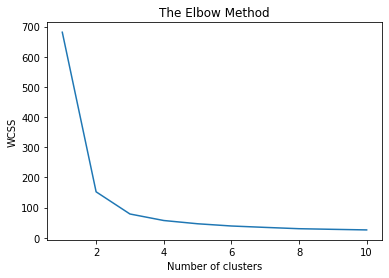

In [8]:
# Finding no of clusters on our dataset by Elbow method

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
sns.lineplot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)

y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [10]:
from sklearn.metrics import accuracy_score

print('The accuracy of K-Mean model is: {}'.format(accuracy_score(Y,y_kmeans)))

The accuracy of K-Mean model is: 0.24


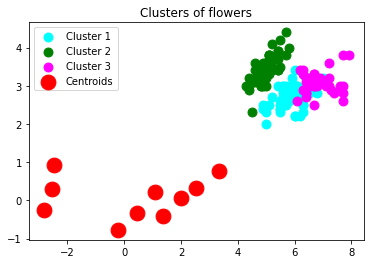

In [26]:
plt.scatter(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], s = 80, c = 'cyan', label = 'Cluster 1')
plt.scatter(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], s = 80, c = 'green', label = 'Cluster 2')
plt.scatter(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1], s = 80, c = 'magenta', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 220, c = 'red',alpha=1, label = 'Centroids')
plt.title('Clusters of flowers')

plt.legend()
plt.show()

Å insight we can get from the scatterplot is the model’s accuracy in determining Cluster 2  is comparatively more to Cluster 1 and Cluster 3.

## Implementing PCA

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
dfs = pca.fit_transform(df)

explained_variance = pca.explained_variance_ratio_

In [16]:
explained_variance 

array([0.92461872, 0.05306648])

## Implementing K-Means with PCA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


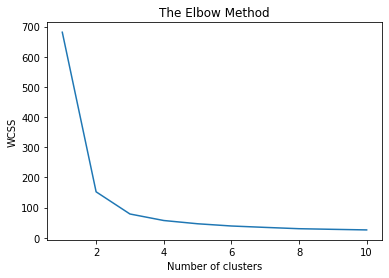

In [17]:
wcss_p = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dfs)
    wcss_p.append(kmeans.inertia_)
sns.lineplot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
kmeans_p = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_p= kmeans_p.fit_predict(dfs)

y_kmeans_p

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [19]:
#from sklearn.metrics import accuracy_score

print('The accuracy of K-Mean model with PCA is: {}'.format(accuracy_score(Y,y_kmeans_p)))

The accuracy of K-Mean model with PCA is: 0.8866666666666667


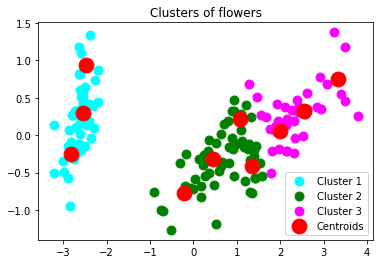

In [25]:
plt.scatter(dfs[y_kmeans_p == 0, 0], dfs[y_kmeans_p == 0, 1], s = 80, c = 'cyan', label = 'Cluster 1')
plt.scatter(dfs[y_kmeans_p == 1, 0], dfs[y_kmeans_p == 1, 1], s = 80, c = 'green', label = 'Cluster 2')
plt.scatter(dfs[y_kmeans_p == 2, 0], dfs[y_kmeans_p == 2, 1], s = 80, c = 'magenta', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 220, c = 'red',alpha=1, label = 'Centroids')
plt.title('Clusters of flowers')

plt.legend()
plt.show()

An insight we can get from the scatterplot is the model’s accuracy in determining Cluster 1 is comparatively more to Cluster 2 and Cluster 3.

# Implementing EM algorithm

In [21]:
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.utils import shuffle
X = pd.DataFrame(iris.data)

Y = pd.DataFrame(iris.target)
X,Y = shuffle(X,Y)
from sklearn.mixture import GaussianMixture

model21=GaussianMixture(n_components=3,random_state=3425)
model21.fit(X)

uu= model21.predict(X)

print('The accuracy of EM model is: {}'.format(accuracy_score(Y,uu)))

The accuracy of EM model is: 0.3333333333333333


# Implementing EM algorithm with PCA

In [22]:
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.utils import shuffle
X = pd.DataFrame(iris.data)

Y = pd.DataFrame(iris.target)
X,Y = shuffle(X,Y)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_p = pca.fit_transform(X)

from sklearn.mixture import GaussianMixture

model2=GaussianMixture(n_components=3,random_state=3425)
model2.fit(X_p)

res= model2.predict(X_p)

print('The accuracy of EM model is: {}'.format(accuracy_score(Y,res)))



The accuracy of EM model is: 0.0


# Comparison of the Models

Accuracy of K-means and EM models

**The accuracy of K-Mean model is: 0.24** wherease, *accuracy* of EM model is 0.3333333333333333.

Accuracy of K-means and EM models on applying PC

**The accuracy of K-Mean model with PCA is: 0.8866666666666667** wherease, *accuracy* of EM model is: 0.98.






# Conclusion

It can be seen that the EM method behaves and performs better than the K-means model in both raw data and PCA data (dimensionally reduced data). On semi-supervised learning, the EM Algorithm provides a viable alternative to classic k-means clustering. It finds multivariate Gaussian distributions for each cluster to offer stable solutions.